<a href="https://colab.research.google.com/github/torresmateo/covid19/blob/master/Estimators.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# COVID-19 simple estimators

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from countryinfo import CountryInfo
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import datetime
from scipy import signal
plt.rcParams['figure.figsize'] = [12, 8]
sns.set()

In [2]:
# get the dataset from https://www.kaggle.com/imdevskp/corona-virus-report and paste it on ../data
df = pd.read_csv('../data/covid_19_clean_complete.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')
df['country_region'] =  df['Country/Region'] + ' ' + df['Province/State'].fillna('').astype(str)
df['country_region'] = df.country_region.str.strip()

In [3]:
south_america = ['Argentina', 'Uruguay', 'Chile', 'Bolivia', 'Paraguay', 'Brazil', 'Ecuador', 'Colombia', 'Venezuela', 'Peru', 'Guyana', 'Suriname', 'French Guiana']
all_countries = df['Country/Region'].unique()

In [4]:
countries_with_region = df[~df['Province/State'].isna()]['Country/Region'].unique()
for c in countries_with_region:
    reg = df[df['Country/Region'] == c]
    reg_confirmed = reg[['Confirmed', 'Date']].groupby('Date').sum().reset_index().copy()
    reg_deaths = reg[['Deaths', 'Date']].groupby('Date').sum().reset_index().copy()
    reg_Recovered = reg[['Recovered', 'Date']].groupby('Date').sum().reset_index().copy()
    reg_new = reg_confirmed.copy()
    reg_new['Province/State'] = 'combined'
    reg_new['Country/Region'] = c
    reg_new['Confirmed'] = reg_confirmed.Confirmed
    reg_new['Deaths'] = reg_deaths.Deaths
    reg_new['Recovered'] = reg_deaths.Deaths
    reg_new['country_region'] = f'{c}'
    reg_new['Lat'] = reg['Lat'].to_numpy()[0]
    reg_new['Long'] = reg['Long'].to_numpy()[0]
    df = df.append(reg_new)

# Simple Linear Regression

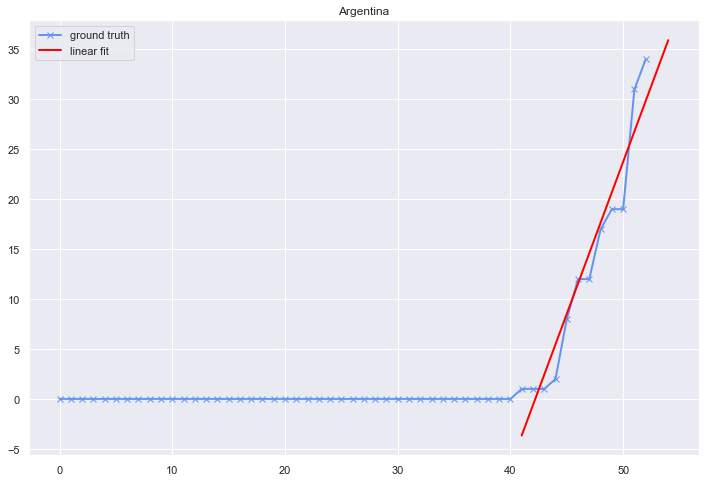

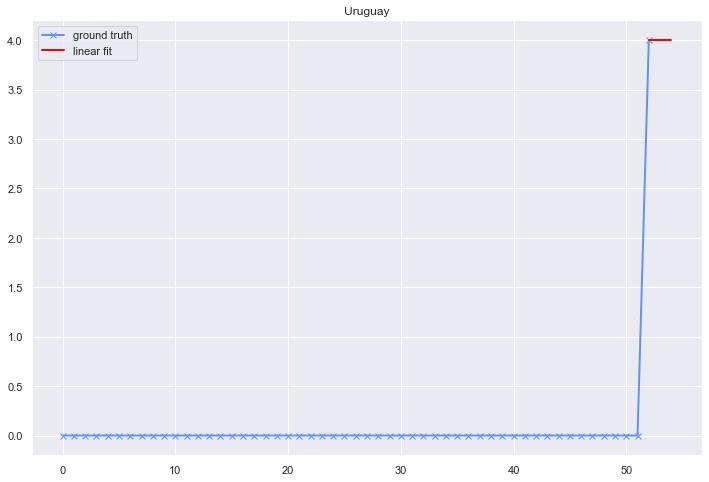

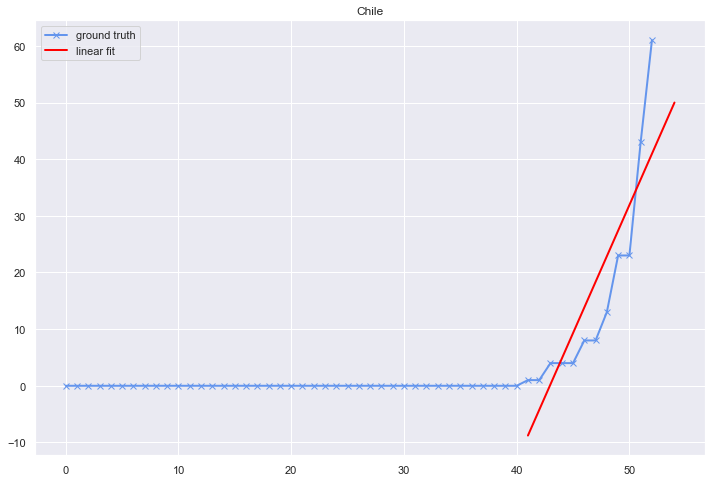

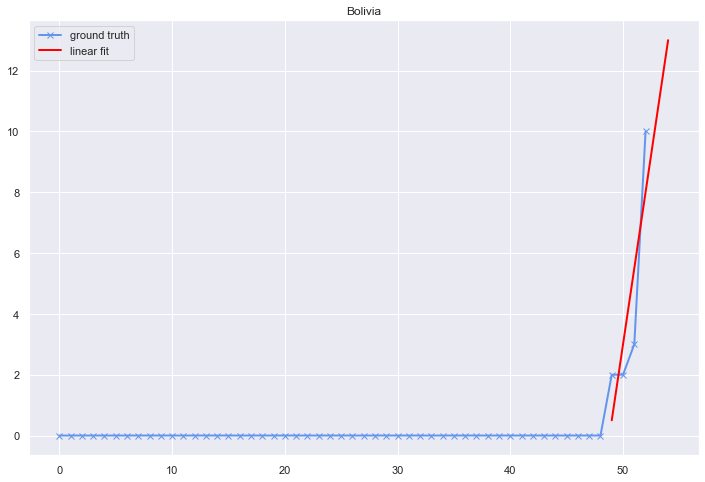

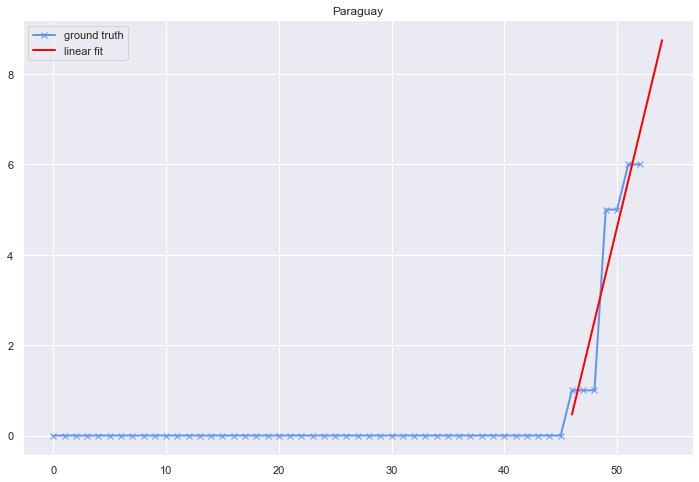

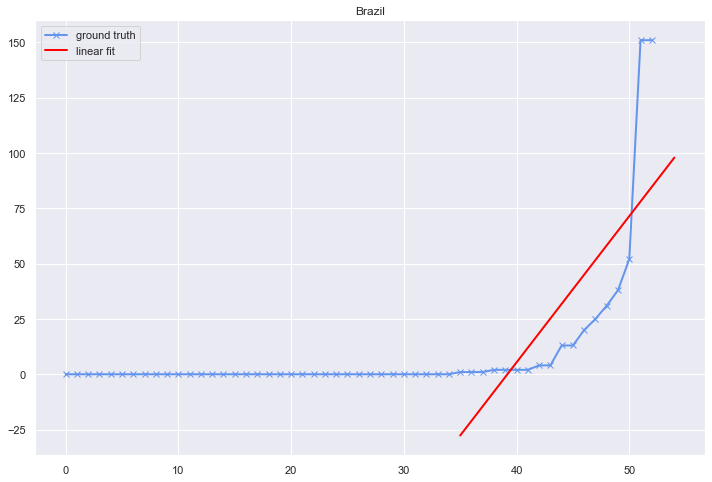

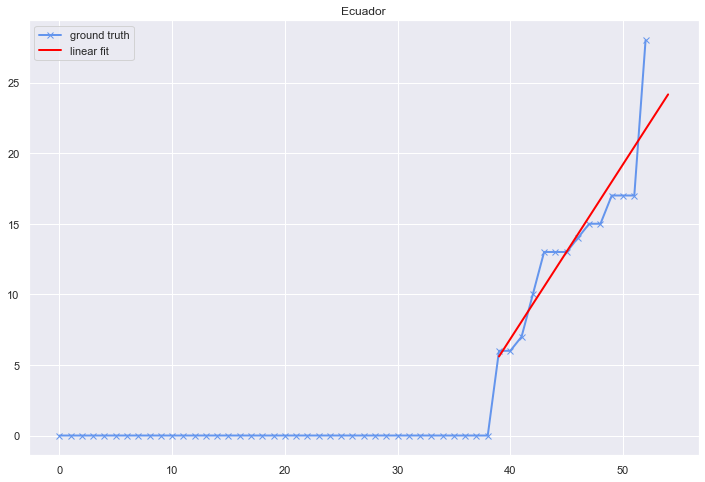

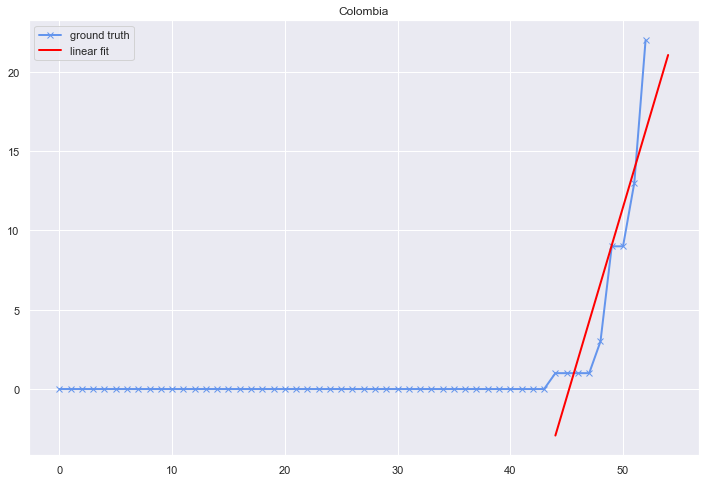

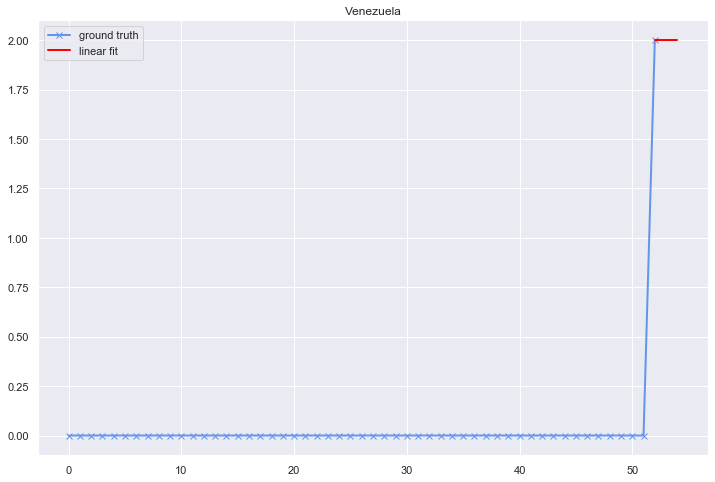

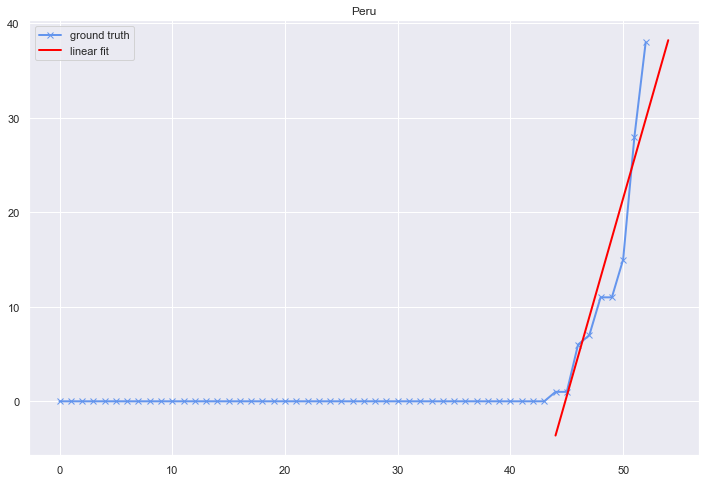

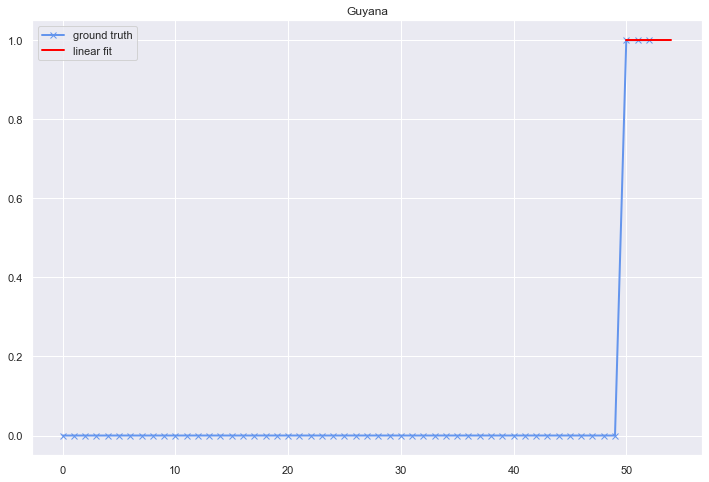

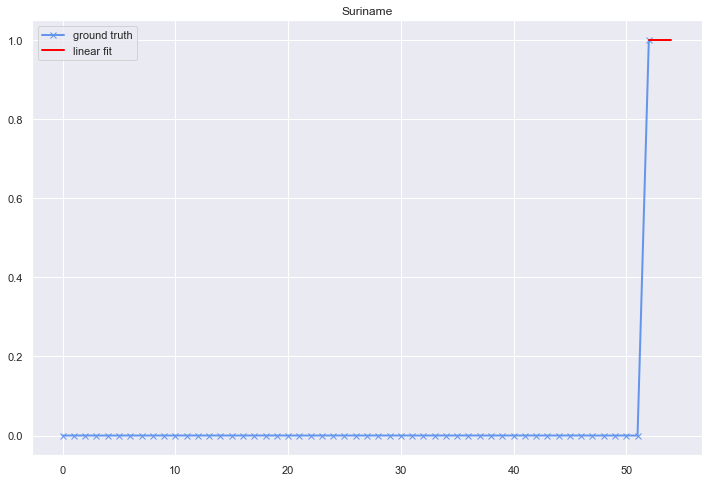

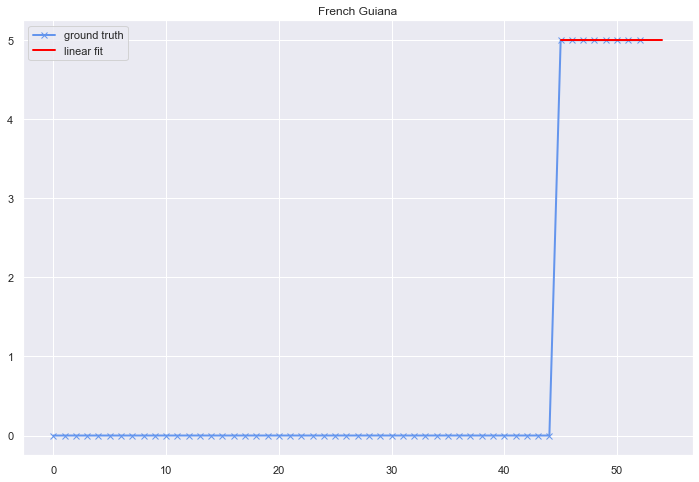

In [5]:
regressions = {}
for c in south_america:
    df_c = df[df['Country/Region'] == c].sort_values('Date')
    X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        # don't model zeroes
        y_fit = y[y>0]
        X_fit = X[-y_fit.shape[0]:]
        X_pred = np.append(X_fit, [X_fit.max()+1, X_fit.max()+2]).reshape(-1,1)
        plt.title(c)
        #plt.yscale('log')
        regressions[c] = LinearRegression().fit(X_fit, y_fit)
        plt.plot(X, y, marker='x', color='cornflowerblue', linewidth=2,
             label="ground truth")
        Y_pred = regressions[c].predict(X_pred)
        plt.plot(X_pred, Y_pred, color='red',linewidth=2,
             label="linear fit")
        plt.legend()
        plt.show()


# Polynomial Regression

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


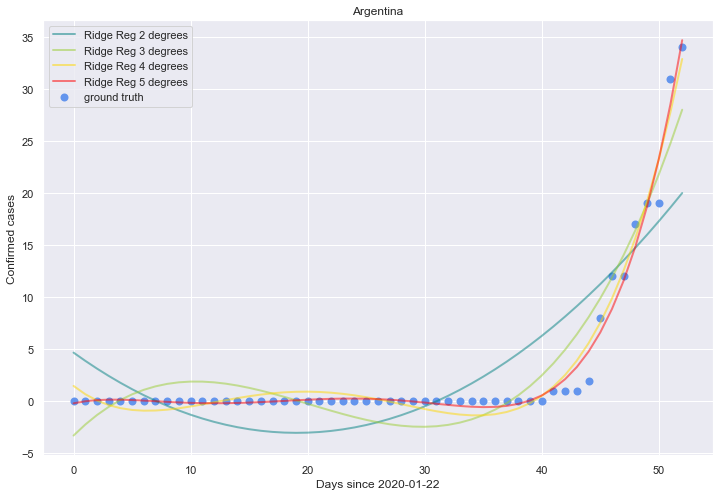

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


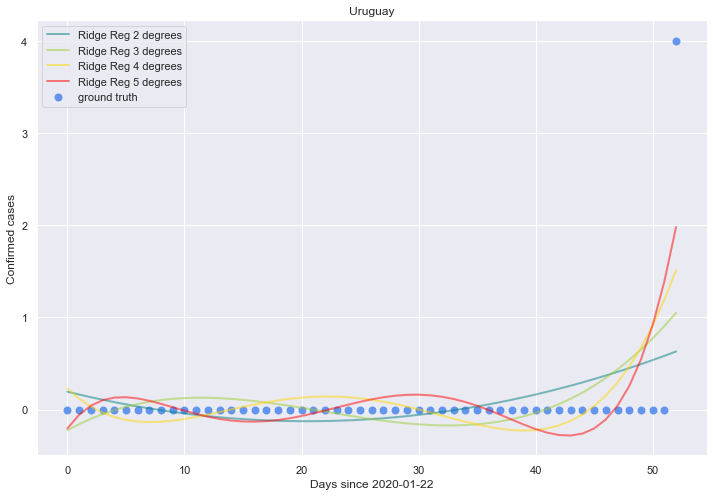

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


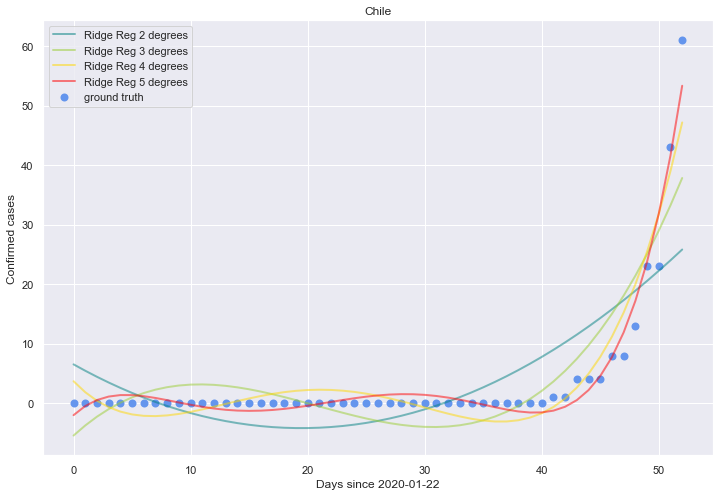

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


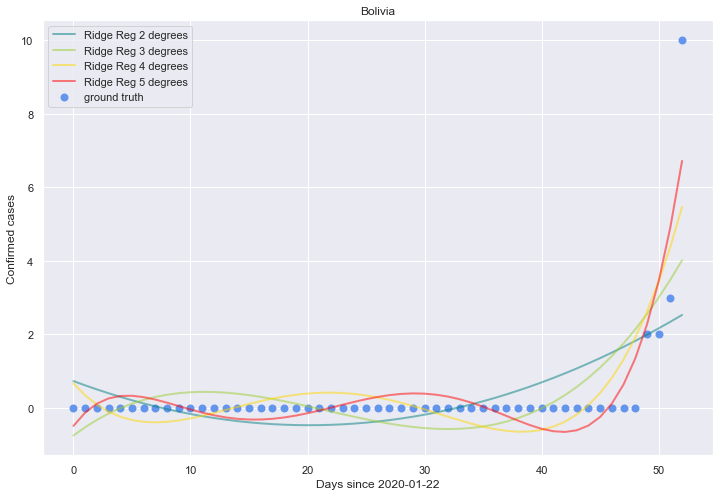

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


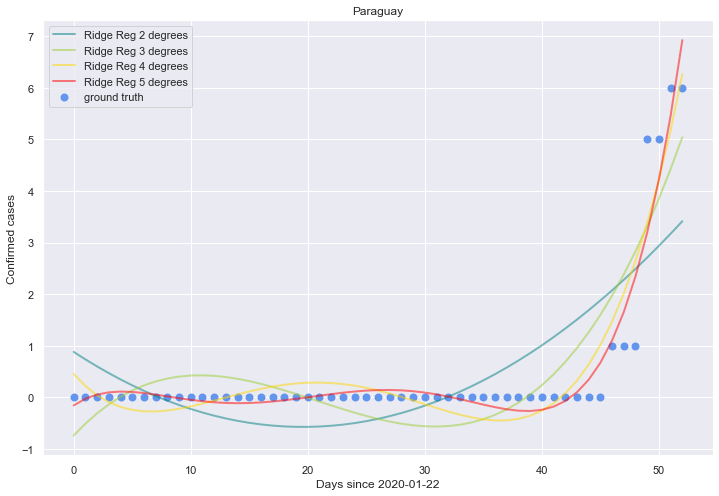

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


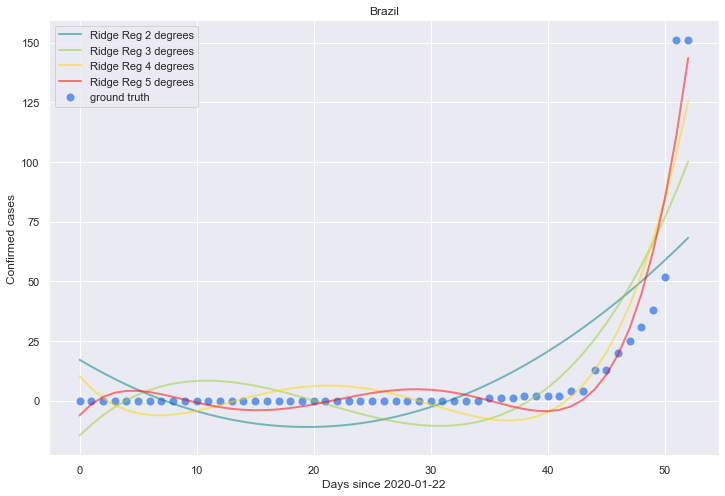

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


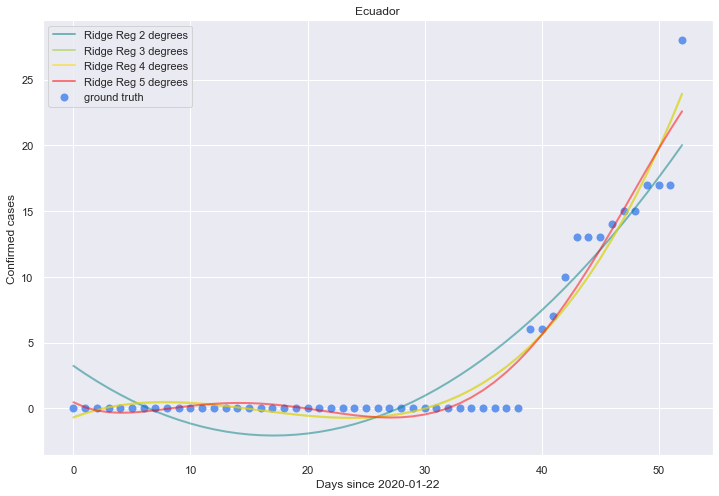

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


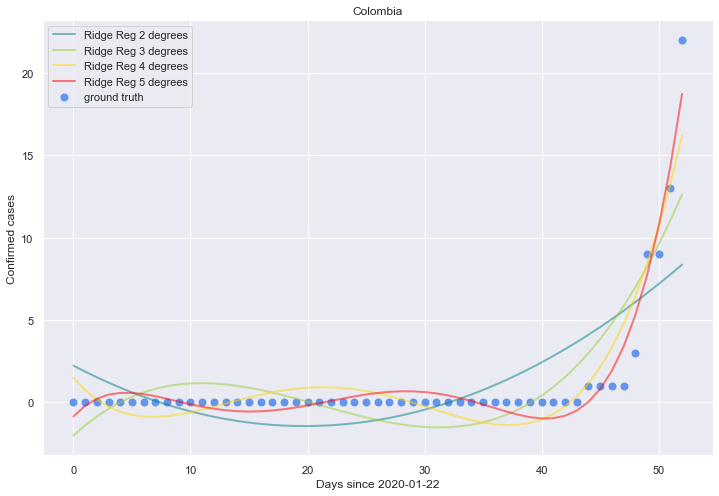

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


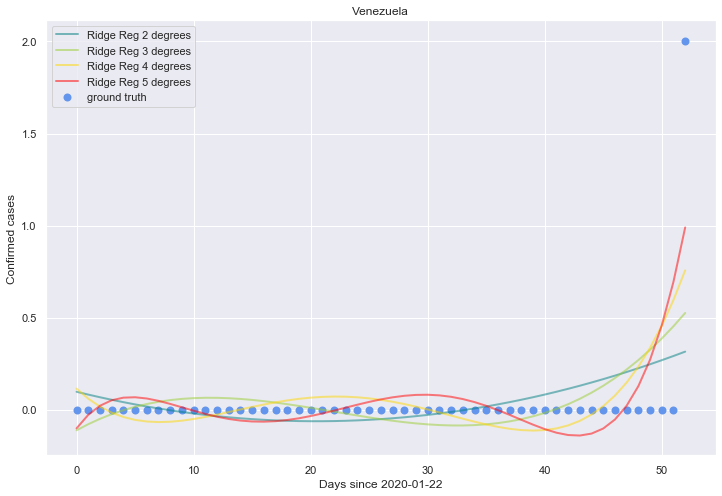

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


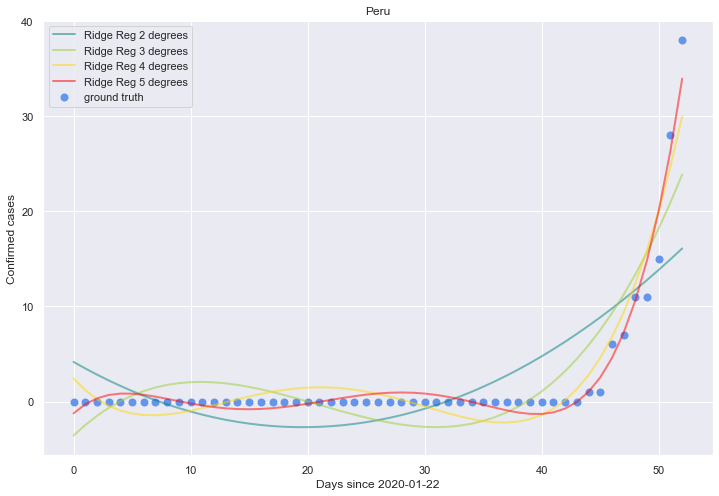

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


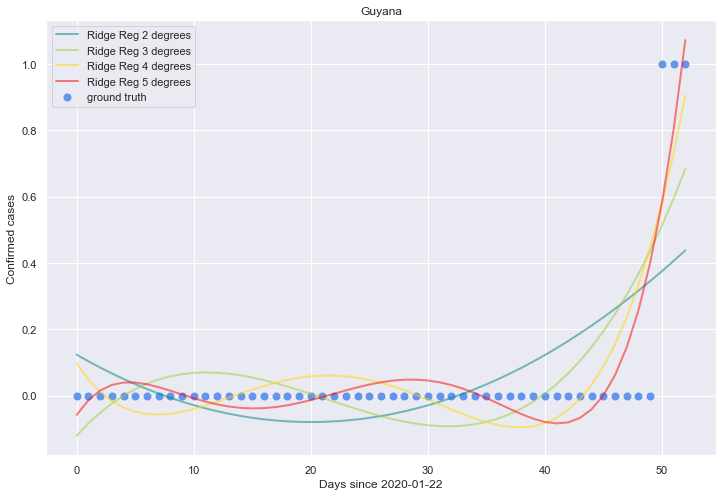

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


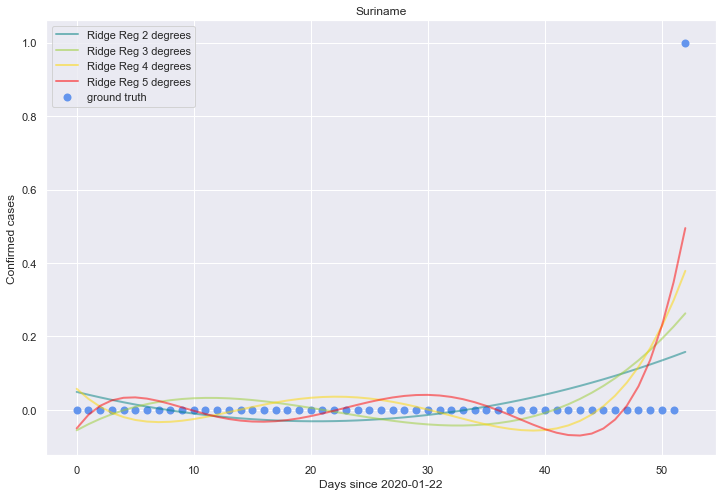

/Users/torresmateo/.virtualenvs/py37/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.85455e-18): result may not be accurate.
  overwrite_a=True).T


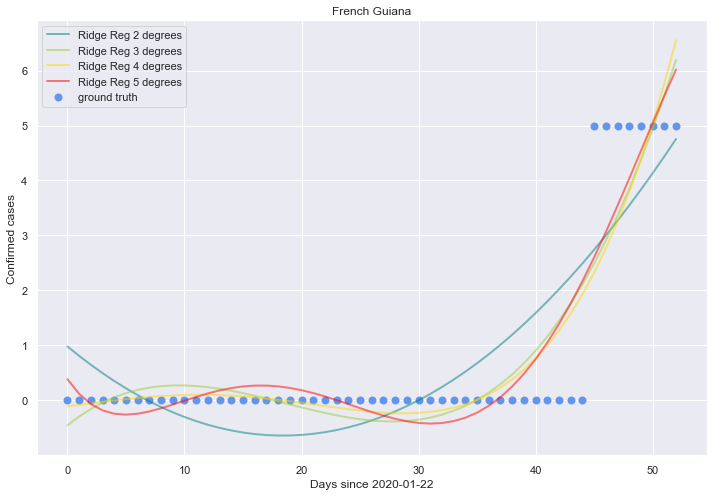

In [6]:
colors = ['teal', 'yellowgreen', 'gold', 'red']
for c in south_america:
    df_c = df[df['Country/Region'] == c].sort_values('Date')
    X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        plt.title(c)
        plt.scatter(X, y, color='cornflowerblue', linewidth=2,
             label="ground truth")
        for count, degree in enumerate([2, 3, 4, 5]):
            model = make_pipeline(PolynomialFeatures(degree), Ridge())
            model.fit(X, y)
            y_plot = model.predict(X)
            plt.plot(X, y_plot, color=colors[count], linewidth=2,
                     label=f'Ridge Reg {degree} degrees', alpha=0.5)
        plt.legend(loc='upper left')
        plt.ylabel('Confirmed cases')
        plt.xlabel('Days since 2020-01-22')
        plt.savefig(f'{c}-RidgeModels.png')
        plt.show()

# Average growth rate

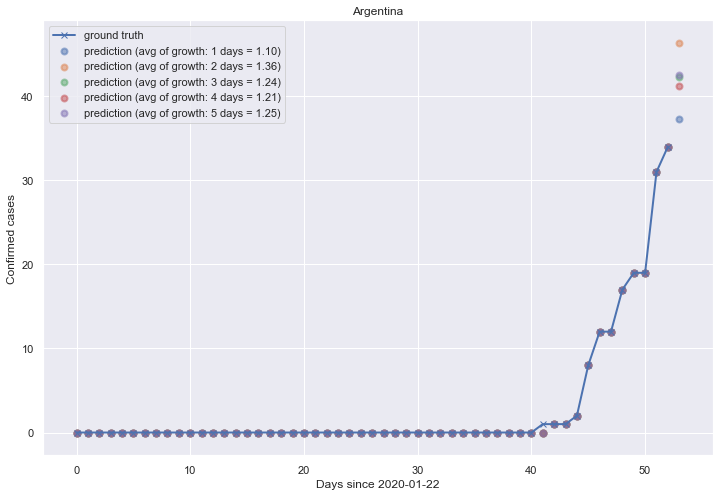

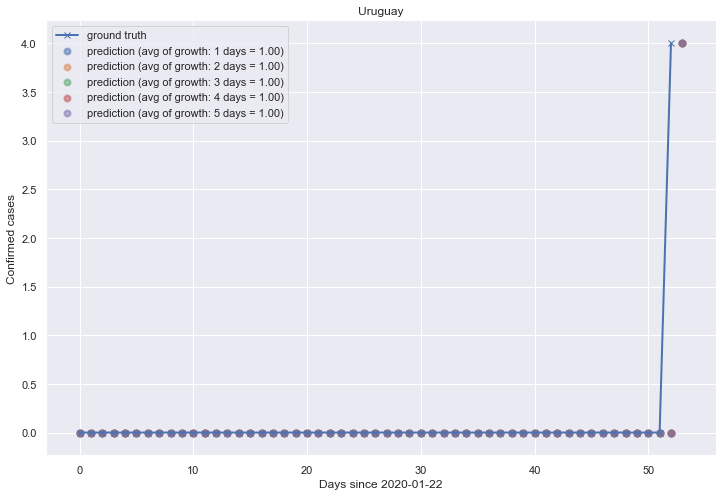

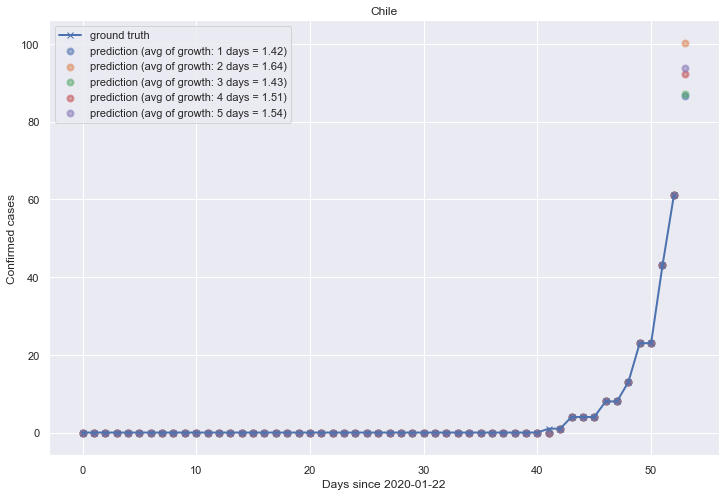

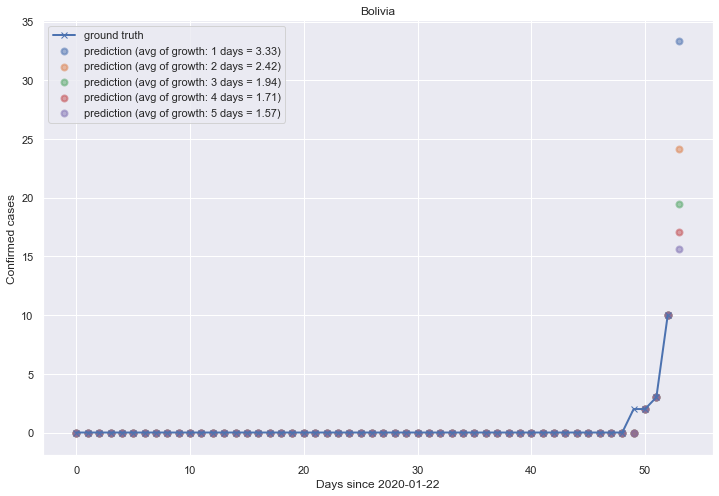

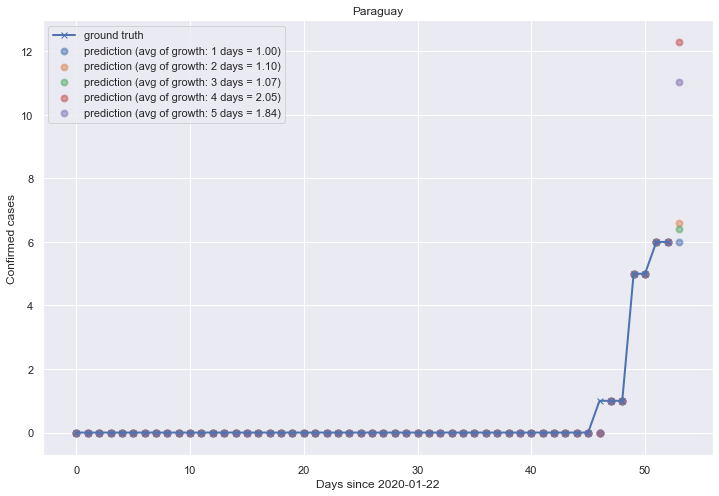

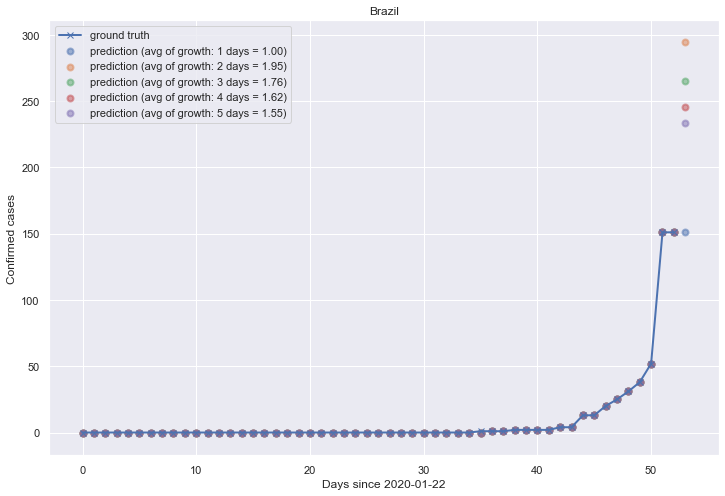

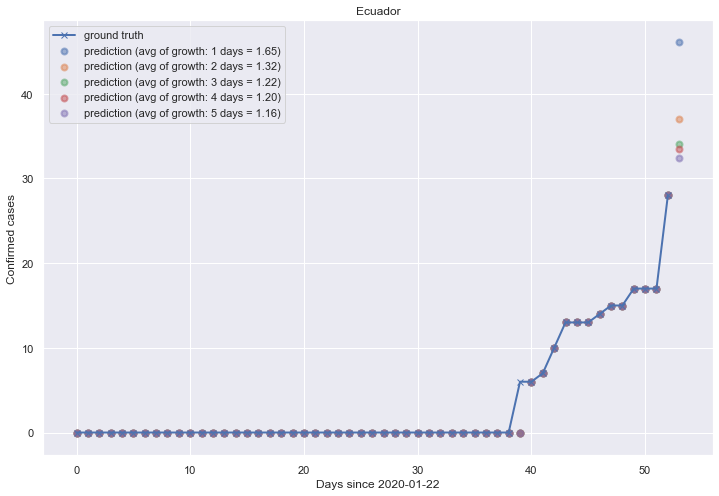

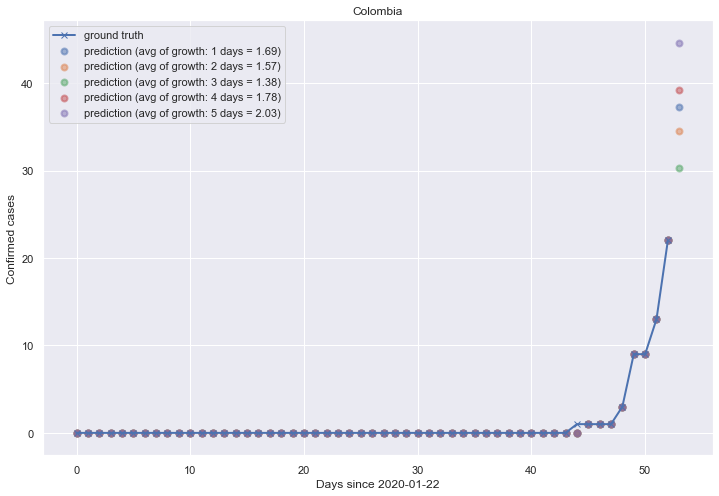

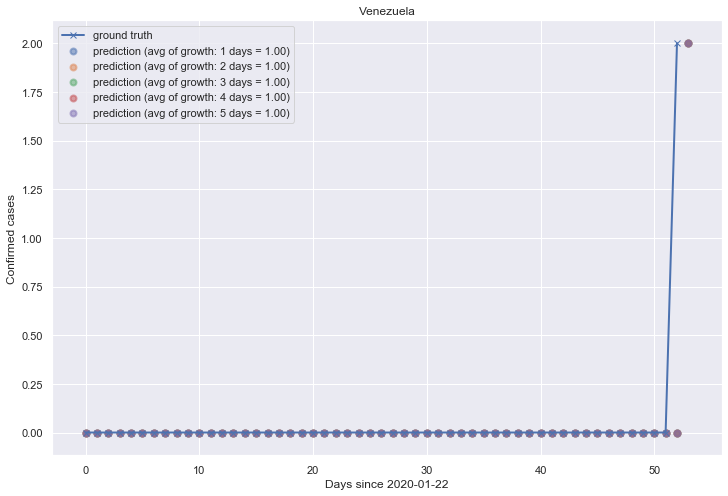

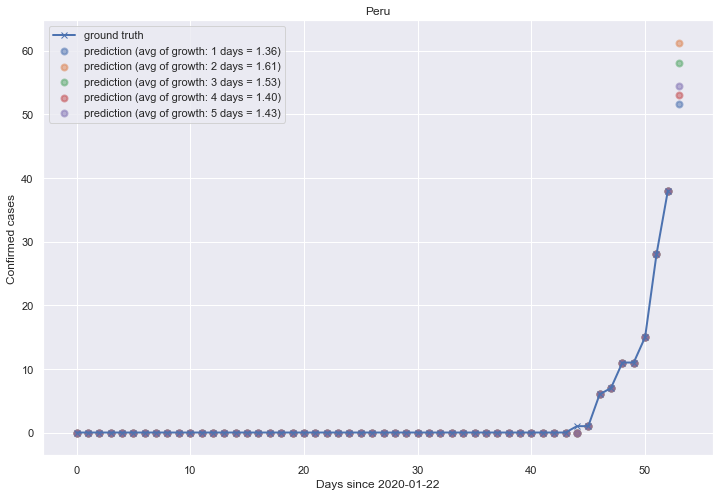

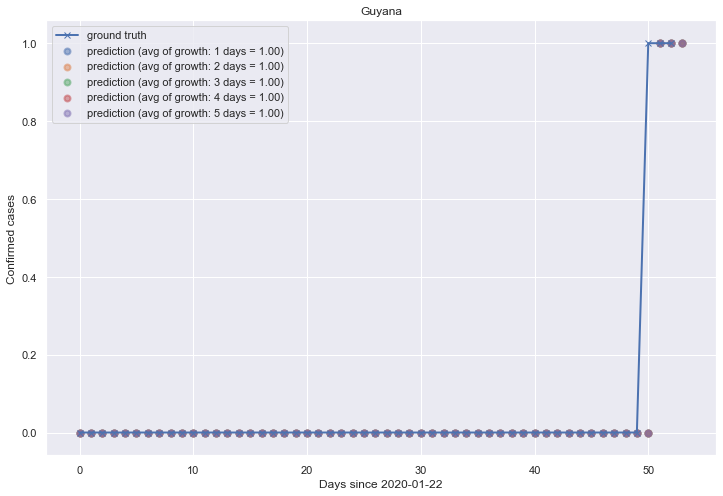

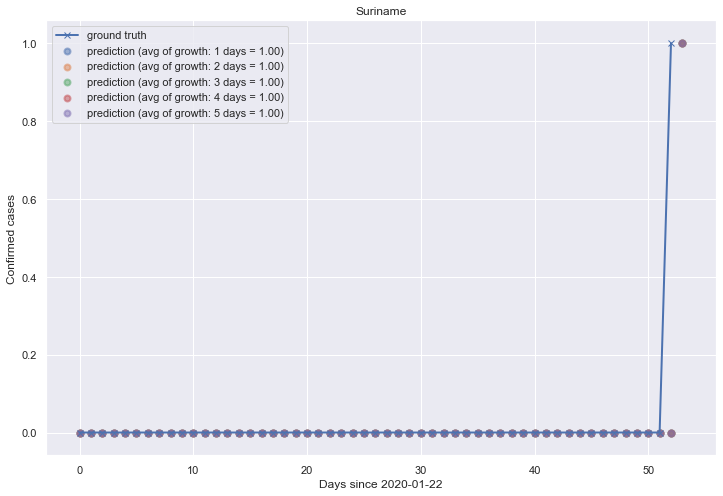

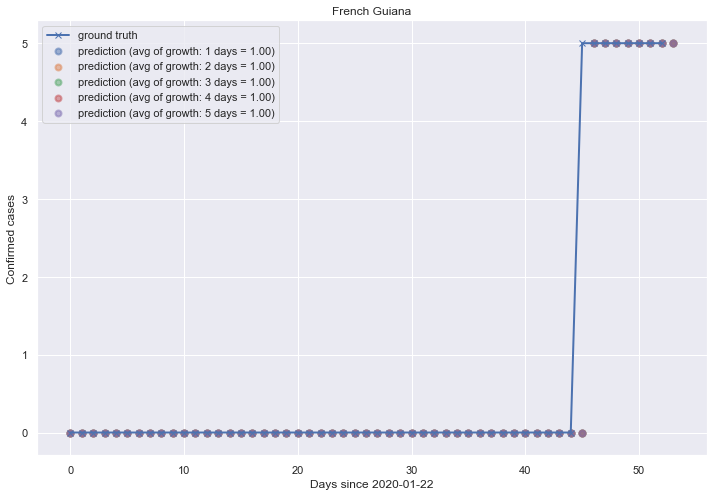

In [7]:
colors = ['teal', 'yellowgreen', 'gold', 'red']
growths = {'country':[], 'avg_1':[], 'avg_2':[], 'avg_3':[], 'avg_4':[], 'avg_5':[]}
for c in south_america:
    df_c = df[df['Country/Region'] == c].sort_values('Date')
    X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
    X_predict = (np.array(list(range(df_c.shape[0] + 1))).reshape(-1,1))
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        growth_rate = np.ones(y.shape[0])
        # learn
        for i in range(y.shape[0]-1):
            if y[i] != 0 and y[i+1] != 0:
                growth_rate[i] = y[i+1]/y[i]
        
        plt.title(c)
        plt.plot(X, y, marker='x', linewidth=2,
             label="ground truth")
        # predict 
        growths[c] = {}
        for avg_days in [1,2,3,4,5]:
            growth_rate[-1] = growth_rate[-(avg_days+1):-1].mean()
            y_pred = np.multiply(y, growth_rate)
            y_pred = np.insert(y_pred,0,y_pred[0])
            plt.scatter(X_predict, y_pred, linewidth=2,
                     label=f'prediction (avg of growth: {avg_days} days = {growth_rate[-1]:.2f})', alpha=0.5)
        plt.legend(loc='upper left')
        plt.ylabel('Confirmed cases')
        plt.xlabel('Days since 2020-01-22')
        plt.show()

# Estimate of "how behind" countries are relative to the country with many

In [8]:
# reproduce facebook plot
countries = ['Italy', 'Germany', 'France', 'Spain', 'Switzerland', 'Japan', 'US']
#countries = ['Italy', 'Germany', 'Spain', 'Switzerland', 'Japan']
offset = {'Italy':0, 
          'Germany':9,
          'Spain':10,
          'Switzerland':13,
          'Japan':0,
          'France':9,
          'US':11.5,
          'UK':13.5
         }

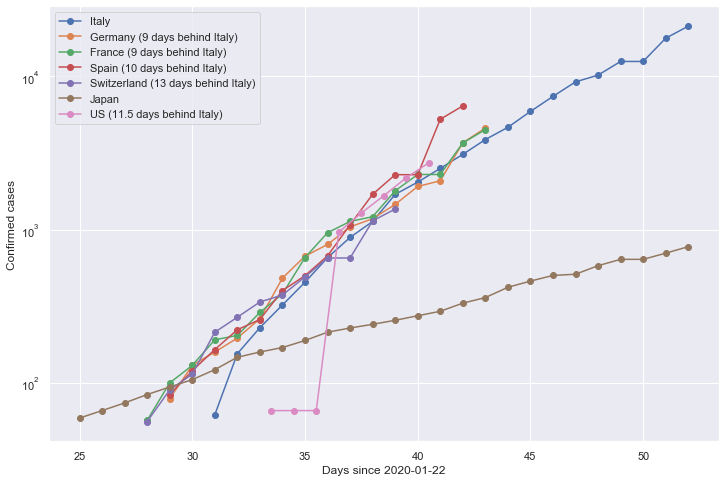

In [9]:
for c in countries:
    df_c = df[(df['country_region'] == c) & (df.Date <= datetime.datetime(2020, 9,3))].sort_values('Date')
    X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
    y = df_c.Confirmed.to_numpy()
    lab = f'{c} ({offset[c]} days behind Italy)' if c not in ['Italy', 'Japan'] else f'{c}'
    plt.plot(X[y>50]-offset[c], y[y>50], marker='o',label=lab)
    #plt.plot(X[y>50], y[y>50], marker='o',label=lab + 'NO OFFSET')
#    plt.plot(X-offset[c], y, marker='o',label=lab)
plt.legend(loc='upper left')
plt.ylabel('Confirmed cases')
plt.xlabel('Days since 2020-01-22')
plt.yscale('log')
plt.show()

Estimate our own calculation by assuming Italy is the point of reference and the curves are supposed to meet at the mean of the country that is "behind"

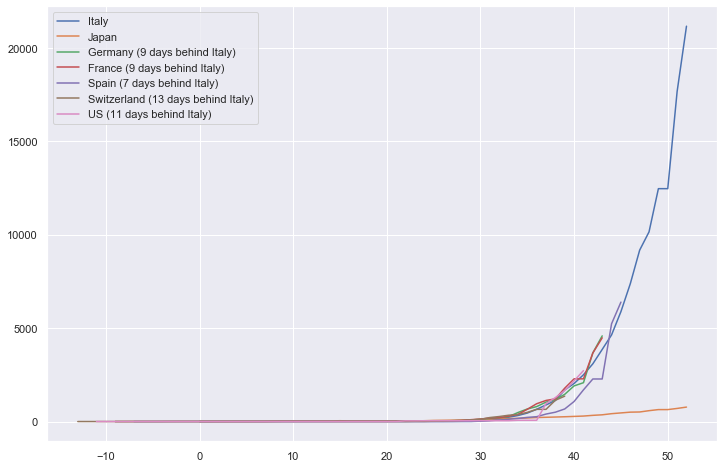

In [10]:
off=0

it_y = df[(df['Country/Region'] == 'Italy')].Confirmed.to_numpy()
jpn_y = df[(df['Country/Region'] == 'Japan')].Confirmed.to_numpy()
X = np.array(list(range(it_y.shape[0]))).reshape(-1,1)
plt.plot(X[off:], it_y[off:], label='Italy')
plt.plot(X[off:], jpn_y[off:], label='Japan')

for c in [coun for coun in countries if coun is not 'Japan']:
    if c != 'Italy':
        df_c = df[(df['country_region'] == c)].sort_values('Date')
        y = df_c.Confirmed.to_numpy()
        X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
        y_middle = (y.max()-y.min())//2
        reference_point = np.argmin(np.abs(y - y_middle))
        reference_point_target = np.argmin(np.abs(it_y - y_middle))
        delta = np.abs(reference_point - reference_point_target)
        plt.plot(X[off:]-delta, y[off:], label=f'{c} ({delta} days behind Italy)')
#plt.yscale('log')
plt.legend()
plt.show()

Same analysis applied to South America

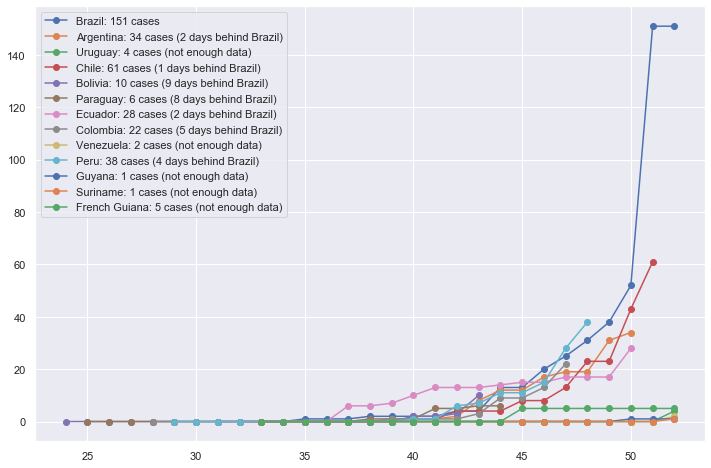

In [11]:
off=-20

br_y = df[(df['Country/Region'] == 'Brazil')].Confirmed.to_numpy()
X = np.array(list(range(it_y.shape[0]))).reshape(-1,1)

plt.plot(X[off:], br_y[off:], marker='o', label=f'Brazil: {br_y.max()} cases')
for c in south_america:
    if c in ['Brazil']:
        continue
    df_c = df[(df['country_region'] == c)].sort_values('Date')
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
        y_middle = (y.max()-y.min())//2
        reference_point = np.argmin(np.abs(y - y_middle))
        reference_point_target = np.argmin(np.abs(br_y - y_middle))
        delta = np.abs(reference_point - reference_point_target)
        if reference_point > 0:
            plt.plot(X[off:]-delta, y[off:], marker='o', label=f'{c}: {y.max()} cases ({delta} days behind Brazil)')
        else:
            plt.plot(X[off:], y[off:], marker='o', label=f'{c}: {y.max()} cases (not enough data)')
#plt.yscale('log')
plt.legend()
plt.show()

A different method to estimate this is a bit more complex, the idea is to align two curves such that the shorter curve (in the x axis) is aligned to the longer curve in such a way as to minimise the difference between the curves. The The current implementation only considers 1 day steps.

In [12]:
def diff(a, b):
    long = a if a.shape[0] > b.shape[0] else b
    short = a if a.shape[0] <= b.shape[0] else b
    # we start by assuming that there is no delay (the short curve is to the right of the long one)
    offset_min=0
    diff_min = np.inf
    # long pad to the left to accommodate for a very long previous overlap
    padded_long = np.zeros(long.shape[0] + short.shape[0])
    padded_long[-long.shape[0]:] = long
    long = padded_long
    for offset in range(long.shape[0] - short.shape[0] + 1): 
        chunk = long[-(short.shape[0]):]
        if offset > 0:
            chunk = long[-(short.shape[0]+offset):-offset]
        diff=np.abs(chunk-short).sum()
        if diff_min > diff:
            diff_min = diff
            offset_min = offset
    return offset_min



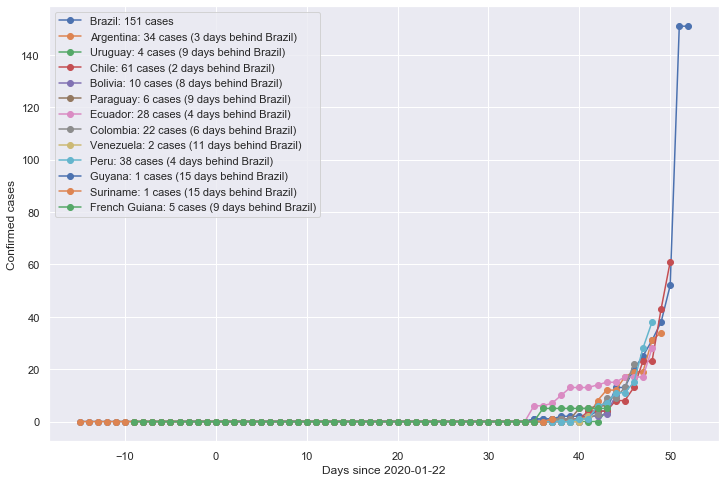

In [13]:
off=0

br_y = df[(df['Country/Region'] == 'Brazil')].Confirmed.to_numpy()
X = np.array(list(range(it_y.shape[0]))).reshape(-1,1)

plt.plot(X[off:], br_y[off:], marker='o', label=f'Brazil: {br_y.max()} cases')
for c in south_america:
    if c in ['Brazil']:
        continue
    df_c = df[(df['country_region'] == c)].sort_values('Date')
    y = df_c.Confirmed.to_numpy()
    if y.shape[0] > 0:
        X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
        y_data = y[y>0]
        delta = diff(y_data, br_y)
        plt.plot(X[off:]-delta, y[off:], marker='o', label=f'{c}: {y.max()} cases ({delta} days behind Brazil)')
#plt.yscale('log')
plt.ylabel('Confirmed cases')
plt.xlabel('Days since 2020-01-22')
plt.legend()
plt.show()
    

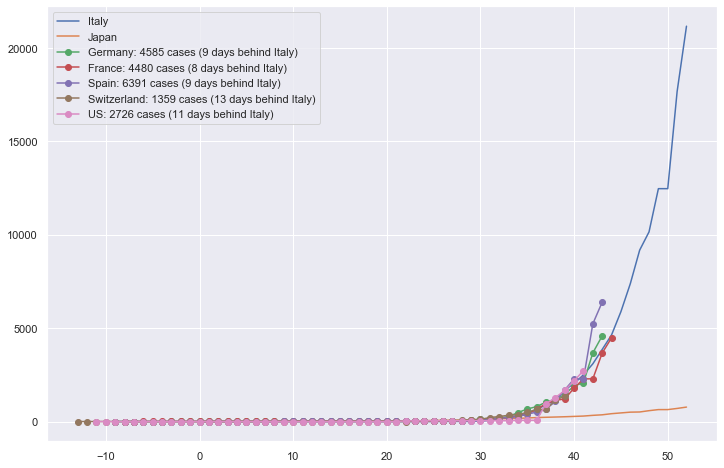

In [14]:
off=0

it_y = df[(df['Country/Region'] == 'Italy')].sort_values('Date').Confirmed.to_numpy()
jpn_y = df[(df['Country/Region'] == 'Japan')].sort_values('Date').Confirmed.to_numpy()
X = np.array(list(range(it_y.shape[0]))).reshape(-1,1)
plt.plot(X[off:], it_y[off:], label='Italy')
plt.plot(X[off:], jpn_y[off:], label='Japan')

for c in [coun for coun in countries if coun is not 'Japan']:
    if c != 'Italy':
        df_c = df[(df['country_region'] == c)].sort_values('Date')
        y = df_c.Confirmed.to_numpy()
        X = np.array(list(range(df_c.shape[0]))).reshape(-1,1)
        y_data = y[y>10]
        delta = diff(y_data, it_y)
        plt.plot(X[off:]-delta, y[off:], marker='o', label=f'{c}: {y.max()} cases ({delta} days behind Italy)')
plt.legend()
plt.show()